### Missing values
- What is missing values
- Missing values occure when no data values is store for a feature in an observation
- Could be represented as "?", "N/A", 0 or just a blank cell


### How to deal with missing data?
- check with the data collection source (like missing while craping, collecting data)
- Drop the missing values
    - drop the variable
    - drop the data entry
- Replace the missing value( better since no data is wasted.) less acurate
    - replace it with an average(of similar datapoints)
    - for categorical replace it by frequency(most common)
    - relace it based on ther functions(guse the missing data)
- Leave it as missing data.
    

In [3]:

headers = ["symboling", "normalized-losses", "make", "fuel-type", "aspiration", "num-of-doors", "body-style", "drive-wheels",
           "engine-location", "wheel-base","length","width","height", "curb-weight", "engine-type", "num-of-cylinders",
           "engine-size","fuel-system","bore", "stroke", "compression-ratio", "horsepower", "peak-rpm", "city-mpg",
           "highway-mpg","price"]

In [37]:
import pandas as pd
import numpy as np

df = pd.read_csv("../data/automobile.csv")

df.columns = headers

df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [38]:
df.replace("?", np.nan, inplace = True)
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


### How to drop missing values 
- Use `dataframes.dropna()`:
- with this method we can choose to drop rows or columns that contain missing values like NaN
- `axis = 0 drop  `the entire row
- `axis = 1 drop  `the entire column
- `df.dropna(subset=["price"], axis=0. inplace = True)`
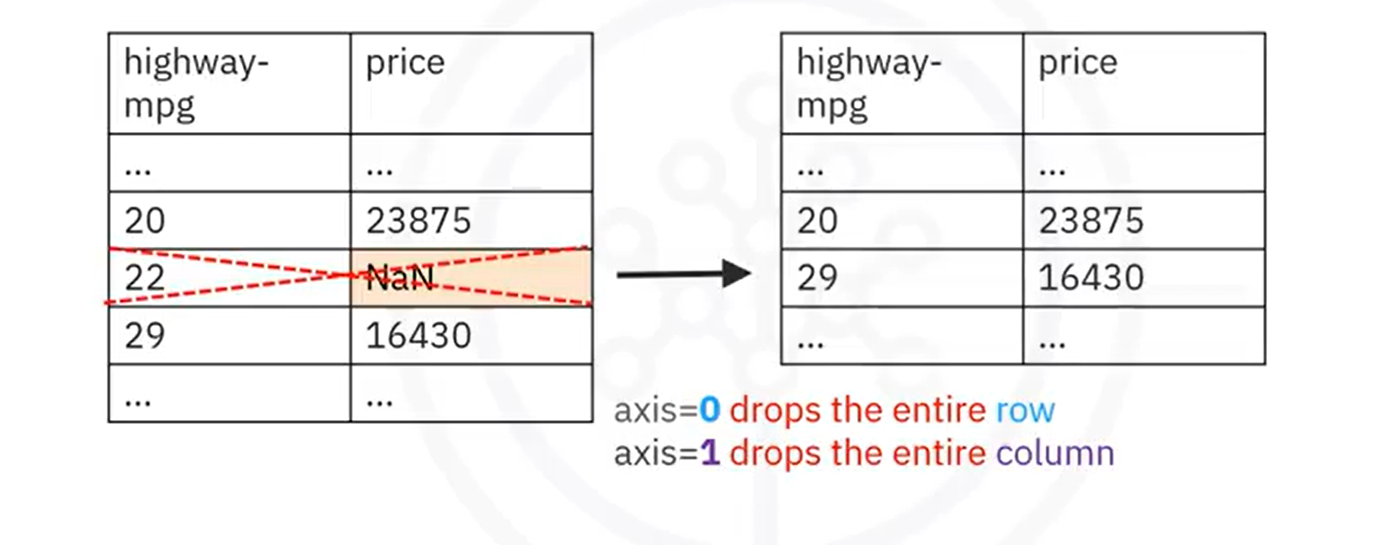

### 
`df = df.dropna(subset=["price"], axis=0)`

In [39]:
tab1 = df[["highway-mpg", "price"]].iloc[8:12]
tab1
print(tab1["price"].isna())


8     False
9      True
10    False
11    False
Name: price, dtype: bool


In [40]:
tab1.dropna(subset=["price"], axis=0, inplace=True)
tab1

,highway-mpg,price
8,20,23875
10,29,16430
11,29,16925


### How to replace missing values
- Use `Dataframe.replace(missing_value, new_value):`
- `mean = df["normalized-losses"].mean()`
- `df["normalized-losses"].replace(np.nan,mean)`
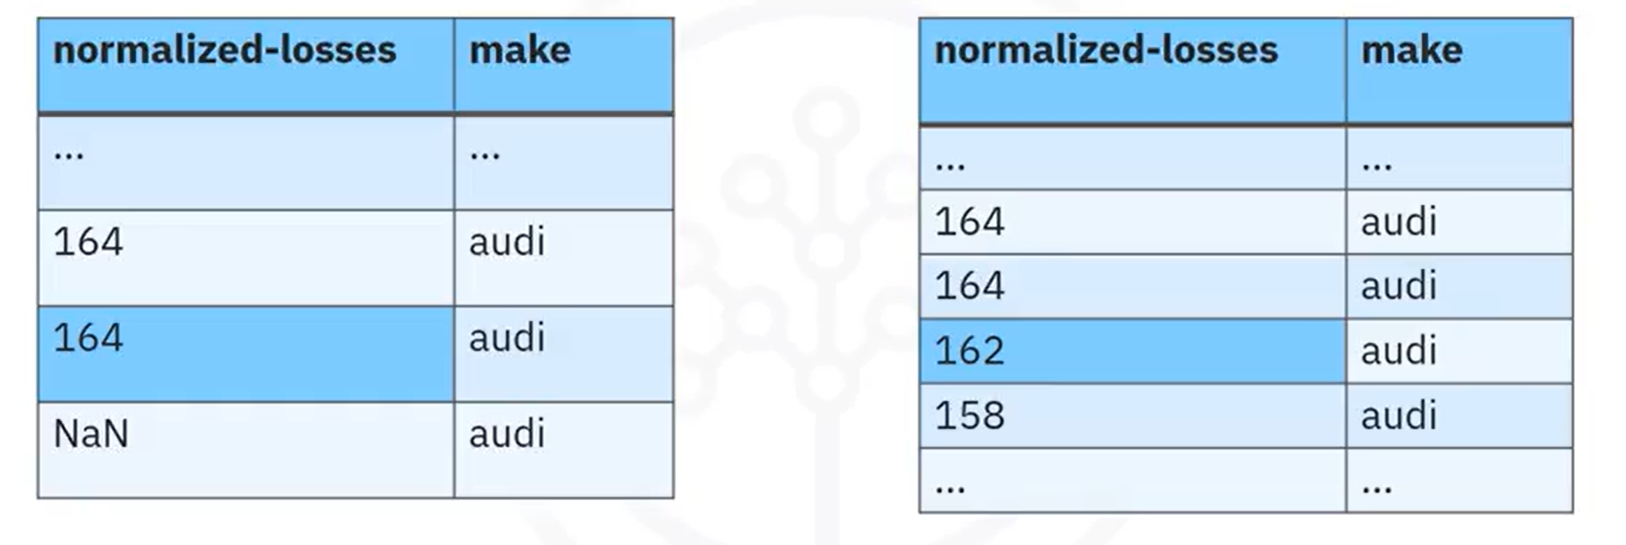

In [49]:
data = df[["normalized-losses", "make"]].loc[0:10]
data

,normalized-losses,make
0,NaN,alfa-romero
1,NaN,alfa-romero
2,NaN,alfa-romero
3,164,audi
4,164,audi
5,NaN,audi
6,158,audi
7,NaN,audi
8,158,audi
9,NaN,audi


In [54]:
data["normalized-losses"] = pd.to_numeric(data["normalized-losses"], errors='coerce')
mean=data["normalized-losses"].mean()

data["normalized-losses"].replace(np.nan, mean)

0     167.2
1     167.2
2     167.2
3     164.0
4     164.0
5     167.2
6     158.0
7     167.2
8     158.0
9     167.2
10    192.0
Name: normalized-losses, dtype: float64